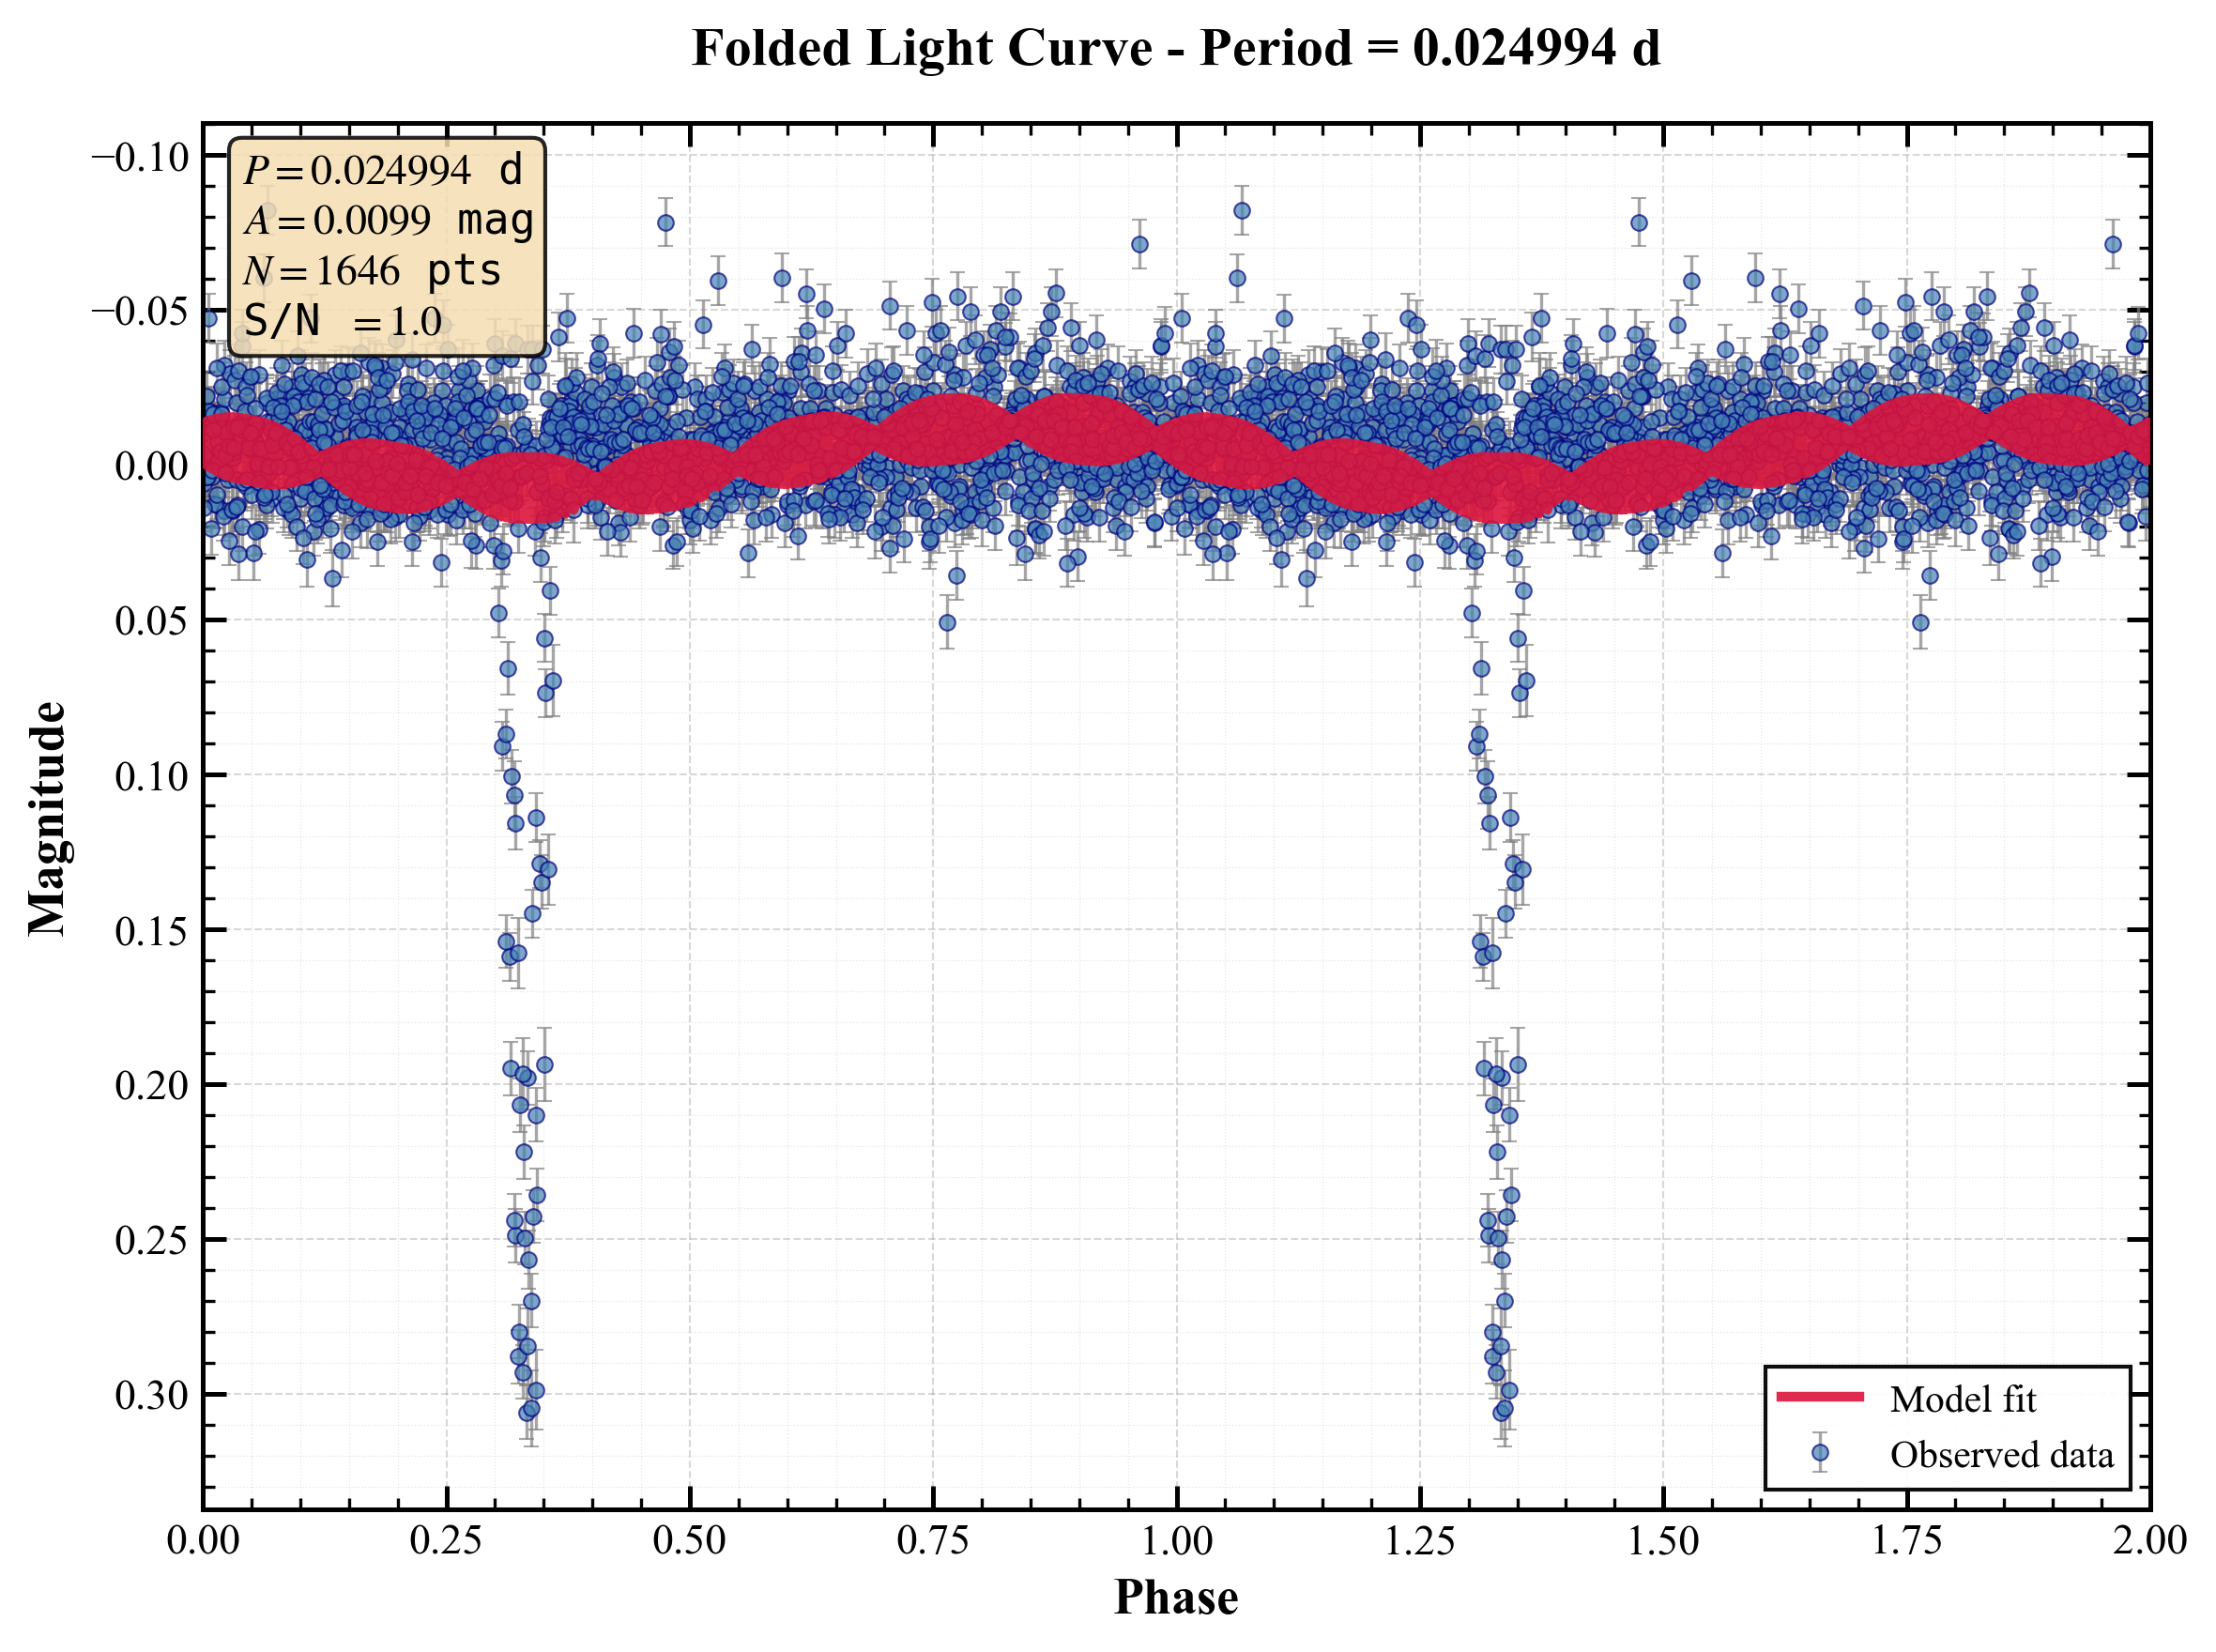

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

# ============================================================================
# CONFIGURACIÓN PARA ESTILO PAPER CIENTÍFICO
# ============================================================================
# Configuración de fuentes y tamaños para publicación
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Times New Roman', 'DejaVu Serif']
rcParams['font.size'] = 11
rcParams['axes.labelsize'] = 12
rcParams['axes.titlesize'] = 13
rcParams['xtick.labelsize'] = 11
rcParams['ytick.labelsize'] = 11
rcParams['legend.fontsize'] = 10
rcParams['figure.titlesize'] = 14
rcParams['mathtext.fontset'] = 'stix'  # Para matemáticas estilo Times

# Configuración de líneas y markers
rcParams['lines.linewidth'] = 1.5
rcParams['axes.linewidth'] = 1.2
rcParams['xtick.major.width'] = 1.2
rcParams['ytick.major.width'] = 1.2
rcParams['xtick.minor.width'] = 0.8
rcParams['ytick.minor.width'] = 0.8

main_data = np.loadtxt("Data_principal.dat")

time = main_data[:, 0]
observed = main_data[:, 1]
calculated=main_data[:,2]
reesiduals=main_data[:,3]

point_weight=main_data[:,4]
point_error=main_data[:,5]

# Cargar periodos
periodos = np.loadtxt("Periods.txt")
# Obtener frecuencias y parámetros de los periodos
freq1 = periodos[0, 0]  # Frecuencia principal (datos observados)
amp1 = periodos[0, 1]   # Amplitud
phase1 = periodos[0, 2] # Fase

freq2 = periodos[1, 0]  # Frecuencia secundaria (residuos)
amp2 = periodos[1, 1]
phase2 = periodos[1, 2]

# Cargar transformadas de Fourier
tf_observed=np.loadtxt("FT_data.txt")
tf_observed_freq=tf_observed[:,0]
tf_observed_amp=tf_observed[:,1]

tf_residuals=np.loadtxt("TF_residuos.txt")
tf_residuals_freq=tf_residuals[:,0]
tf_residuals_amp=tf_residuals[:,1]

tf_spectral_window=np.loadtxt("TF_Freq_folded_with_spectral_window.txt")
tf_spectral_window_freq=tf_residuals[:,0]
tf_spectral_window_amp=tf_residuals[:,1]

#ruido
noise_spectrum=np.loadtxt("Noisefrequency.dat")
noise_amp=noise_spectrum[:,1]
freq_for_noise=noise_spectrum[:,0]

#ruido freq1
noisefre=np.loadtxt("Noises_singles.dat")
sn_f1=noisefre[0,2]
noise_amp_f1=noisefre[0,1]
freq_f1=noisefre[0,0]

sn_f2=noisefre[1,2]
noise_amp_f2=noisefre[1,1]
freq_f2=noisefre[1,0]
# ============================================================================
# CALCULAR FASE PLEGADA
# ============================================================================
phase = (time * freq1) % 1

# Crear doble fase para mejor visualización (0 a 2)
phase_double = np.concatenate([phase, phase + 1])
obs_double = np.concatenate([observed, observed])
calc_double = np.concatenate([calculated, calculated])
err_double = np.concatenate([point_error, point_error])

# Ordenar por fase para la línea del modelo
sort_idx = np.argsort(phase_double)

# ============================================================================
# CREAR FIGURA ESTILO PAPER
# ============================================================================
fig, ax = plt.subplots(figsize=(8, 6), dpi=300)

# Puntos observados con barras de error
ax.errorbar(phase_double, obs_double, yerr=err_double,
            fmt='o', markersize=4, markerfacecolor='steelblue',
            markeredgecolor='navy', markeredgewidth=0.5,
            ecolor='gray', elinewidth=0.8, capsize=2, capthick=0.8,
            alpha=0.7, zorder=2, label='Observed data')

# Modelo ajustado
ax.plot(phase_double[sort_idx], calc_double[sort_idx],
        color='crimson', linewidth=2.5, alpha=0.9,
        zorder=3, label='Model fit')

# ============================================================================
# ETIQUETAS Y FORMATO
# ============================================================================
ax.set_xlabel('Phase', fontsize=13, fontweight='bold')
ax.set_ylabel('Magnitude', fontsize=13, fontweight='bold')
ax.set_title(f'Folded Light Curve - Period = {period1:.6f} d', 
             fontsize=14, fontweight='bold', pad=15)

# Invertir eje Y (magnitudes)
ax.invert_yaxis()

# Límites del eje X
ax.set_xlim(0, 2)

# Grid sutil
ax.grid(True, which='major', linestyle='--', linewidth=0.5, 
        alpha=0.3, color='gray')
ax.grid(True, which='minor', linestyle=':', linewidth=0.3, 
        alpha=0.2, color='gray')

# Ticks menores
ax.minorticks_on()
ax.tick_params(which='major', direction='in', length=6, width=1.2, 
               top=True, right=True)
ax.tick_params(which='minor', direction='in', length=3, width=0.8, 
               top=True, right=True)

# Leyenda
legend = ax.legend(loc='best', frameon=True, fancybox=False, 
                   shadow=False, framealpha=0.95, edgecolor='black')
legend.get_frame().set_linewidth(1.0)

# ============================================================================
# AÑADIR INFORMACIÓN ESTADÍSTICA (TÍPICO EN PAPERS)
# ============================================================================
textstr = '\n'.join([
    f'$P = {period1:.6f}$ d',
    f'$A = {amp1:.4f}$ mag',
    f'$N = {len(time)}$ pts',
    f'S/N $= {sn_f1:.1f}$'
])

# Caja de texto con información
props = dict(boxstyle='round', facecolor='wheat', alpha=0.85, 
             edgecolor='black', linewidth=1.0)
ax.text(0.02, 0.98, textstr, transform=ax.transAxes, 
        fontsize=11, verticalalignment='top',
        bbox=props, family='monospace')

# ============================================================================
# AJUSTES FINALES Y GUARDADO
# ============================================================================
plt.tight_layout()
plt.show()

In [23]:
residuals = main_data[:, 3]
from matplotlib.gridspec import GridSpec
gs = GridSpec(3, 3, figure=fig, hspace=0.35, wspace=0.3)


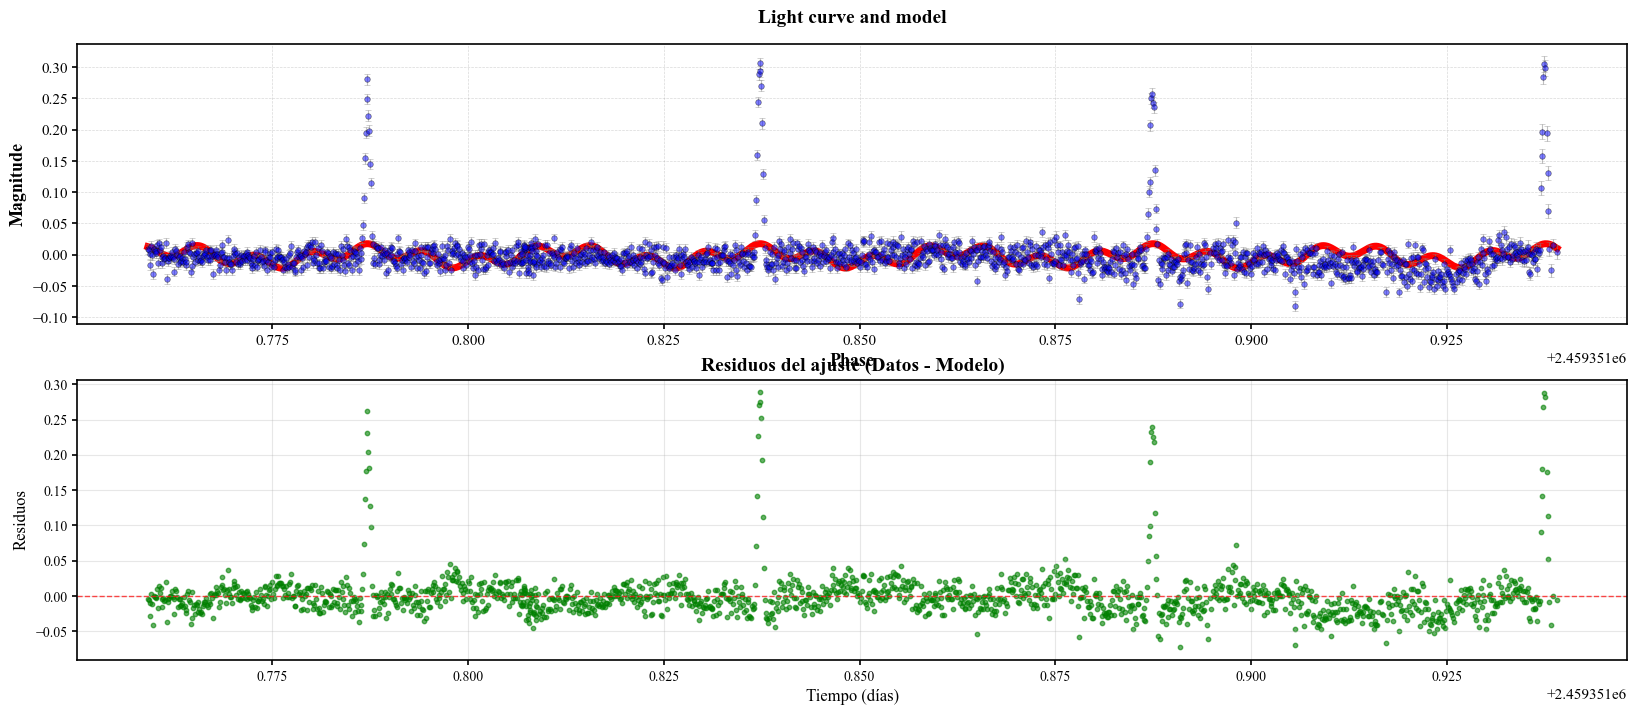

In [59]:

plt.figure(figsize=(20, 8), dpi=100)
plt.subplot(2,1,1)
plt.plot(time, calculated, 'r-', linewidth=5, alpha=1, label='Modelo ajustado')
plt.errorbar(time, observed, point_error,  alpha=0.5, color='silver',fmt='o', markersize=4, markerfacecolor='blue',
            markeredgecolor='black', markeredgewidth=0.5,
            ecolor='gray', elinewidth=0.8, capsize=2, capthick=0.8, zorder=2, label='Observed data')
plt.xlabel('Phase', fontsize=13, fontweight='bold')
plt.ylabel('Magnitude', fontsize=13, fontweight='bold')
plt.title(f'Light curve and model', 
             fontsize=14, fontweight='bold', pad=15)

plt.grid(True, which='major', linestyle='--', linewidth=0.5, 
        alpha=0.3, color='gray')
plt.grid(True, which='minor', linestyle=':', linewidth=0.3, 
        alpha=0.2, color='gray')

plt.subplot(2,1,2)
plt.scatter(time, residuals, s=10, alpha=0.6, color='green')
plt.axhline(y=0, color='r', linestyle='--', linewidth=1, alpha=0.7)
plt.xlabel('Tiempo (días)', fontsize=12)
plt.ylabel('Residuos', fontsize=12)
plt.title('Residuos del ajuste (Datos - Modelo)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tick_params(labelsize=10)


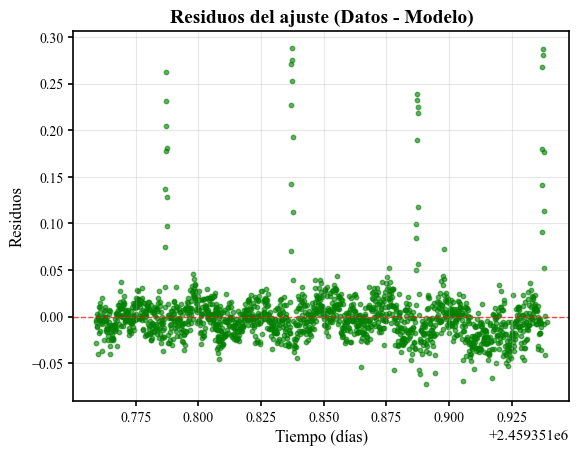

In [56]:


plt.scatter(time, residuals, s=10, alpha=0.6, color='green')
plt.axhline(y=0, color='r', linestyle='--', linewidth=1, alpha=0.7)
plt.xlabel('Tiempo (días)', fontsize=12)
plt.ylabel('Residuos', fontsize=12)
plt.title('Residuos del ajuste (Datos - Modelo)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tick_params(labelsize=10)

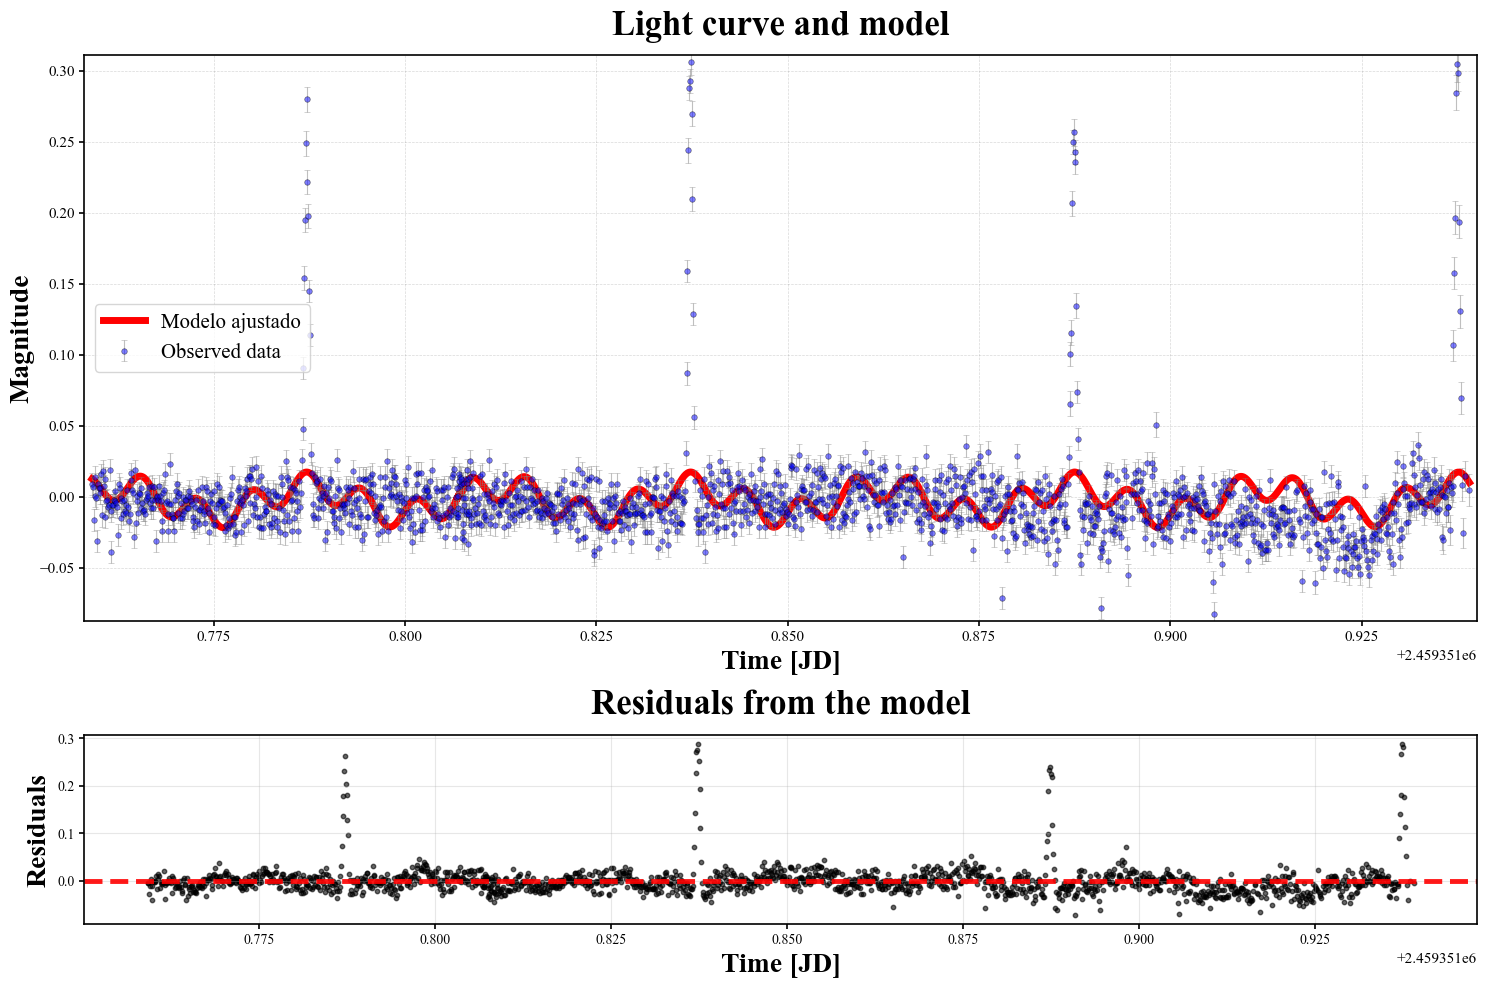

In [122]:
fig, (ax1, ax2) = plt.subplots(
    2, 1,
    figsize=(15, 10),
    dpi=100,
    gridspec_kw={'height_ratios': [3, 1]}   # <--- controla tamaños relativos
)

# ---------- GRÁFICO PRINCIPAL ----------
ax1.plot(time, calculated, 'r-', linewidth=5, alpha=1, label='Modelo ajustado')
ax1.errorbar(time, observed, point_error, alpha=0.5, color='silver', fmt='o',
             markersize=4, markerfacecolor='blue',
             markeredgecolor='black', markeredgewidth=0.5,
             ecolor='gray', elinewidth=0.8, capsize=2, capthick=0.8,
             zorder=2, label='Observed data')

ax1.set_xlabel('Time [JD]', fontsize=20, fontweight='bold')
ax1.set_ylabel('Magnitude', fontsize=20, fontweight='bold')
ax1.set_title('Light curve and model', fontsize=25, fontweight='bold', pad=15)

ax1.grid(True, which='major', linestyle='--', linewidth=0.5, alpha=0.3, color='gray')
ax1.grid(True, which='minor', linestyle=':',  linewidth=0.3, alpha=0.2, color='gray')
ax1.set_xlim(min(time)-0.001,max(time)+0.001)
ax1.set_ylim(min(observed)-0.005,max(observed)+0.005)

# ---------- GRÁFICO DE RESIDUOS ----------
ax2.scatter(time, residuals, s=10, alpha=0.6, color='black')
ax2.axhline(y=0, color='r', linestyle='--', linewidth=3.5, alpha=0.9)


ax2.set_xlabel('Time [JD]', fontsize=20, fontweight='bold')
ax2.set_ylabel('Residuals', fontsize=20, fontweight='bold')
ax2.set_title('Residuals from the model', fontsize=25, fontweight='bold', pad=15)


ax2.grid(True, alpha=0.3)

ax2.tick_params(labelsize=10)

plt.tight_layout()
ax1.legend(fontsize=15)
#ax2.legend(fontsize=15)
plt.show()


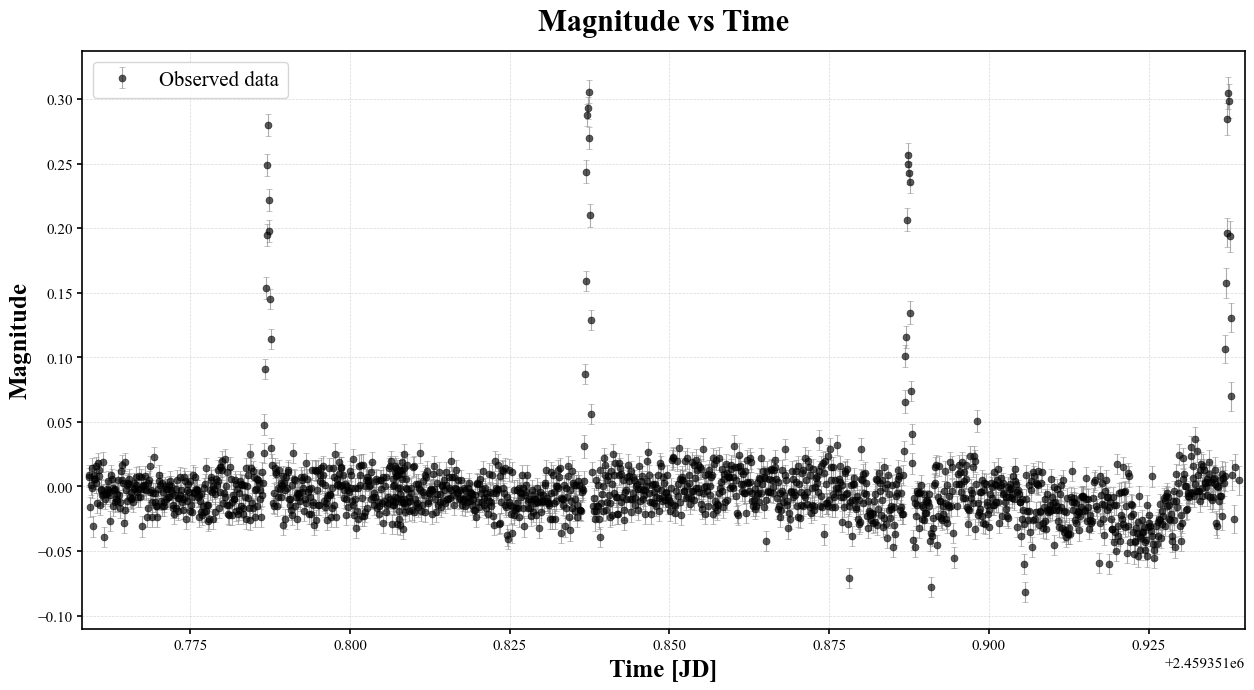

In [119]:
plt.figure(figsize=(15,7.5))
#plt.plot(time, observed, 'r-', linewidth=5, alpha=1, label='Modelo ajustado')
plt.errorbar(time, observed, point_error, alpha=0.65, color='silver', fmt='o',
             markersize=5, markerfacecolor='black',
             markeredgecolor='black', markeredgewidth=0.5,
             ecolor='gray', elinewidth=0.8, capsize=2, capthick=0.8,
             zorder=2, label='Observed data')

plt.xlabel('Time [JD]', fontsize=18, fontweight='bold')
plt.ylabel('Magnitude', fontsize=18, fontweight='bold')
plt.title('Magnitude vs Time', fontsize=22, fontweight='bold', pad=15)

plt.grid(True, which='major', linestyle='--', linewidth=0.5, alpha=0.3, color='gray')
plt.grid(True, which='minor', linestyle=':',  linewidth=0.3, alpha=0.2, color='gray')
plt.xlim(min(time)-0.001,max(time)+0.001)
plt.legend(fontsize=15)
#plt.ylim((observed)-0.005,max(observed)+0.005)